In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
import pipeline_utilities as p_utils
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from prophet import Prophet
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [2]:
# Import data
file_path = 'Resources/summer.csv'
df = pd.read_csv(file_path)
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
#Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
#data exploration - module 12 activities
# p_value evaluation
# Z score
# histogram
# plotting
# heatmap

In [5]:
#drop unnecessary columns   
clean_df = p_utils.drop_columns(df)
clean_df.head()

,Year,Sport,Country,Gender,Medal
0,1896,Aquatics,HUN,Men,Gold
1,1896,Aquatics,AUT,Men,Silver
2,1896,Aquatics,GRE,Men,Bronze
3,1896,Aquatics,GRE,Men,Gold
4,1896,Aquatics,GRE,Men,Silver


In [35]:
#get medal count by country, sport, gender and medal groupings
medal_type_ct_country = df.groupby(['Year','Country','Medal']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
medal_type_ct_country.head()

,Year,Country,Medal,Medal_count
0,1980,URS,Gold,192
1,1984,USA,Gold,168
2,1996,USA,Gold,160
3,2012,USA,Gold,147
4,1904,USA,Gold,146


In [36]:
#select USA and set year as index
usa_df = medal_type_ct_country.loc[medal_ct_country['Country']=='USA'].sort_values(by=['Year'])
usa_df.set_index('Year',inplace=True)
usa_df.head()


,Country,Medal,Medal_count
Year,,,
1896,USA,Bronze,2
1896,USA,Silver,7
1896,USA,Gold,11
1900,USA,Silver,14
1900,USA,Bronze,14


In [6]:
#get medal count by country, sport, gender and medal groupings
medal_ct_country = df.groupby(['Year','Country']).agg(Medal_count=('Medal','count')).sort_values('Medal_count', ascending=False).reset_index()
medal_ct_country.head()


,Year,Country,Medal_count
0,1980,URS,442
1,1904,USA,394
2,1908,GBR,347
3,1984,USA,333
4,2008,USA,315


In [7]:
#select USA and set year as index
usa_df = medal_ct_country.loc[medal_ct_country['Country']=='USA'].sort_values(by=['Year'])
usa_df.set_index('Year',inplace=True)
usa_df.head()

,Country,Medal_count
Year,,
1896,USA,20
1900,USA,55
1904,USA,394
1908,USA,63
1912,USA,101


<Axes: xlabel='Year'>

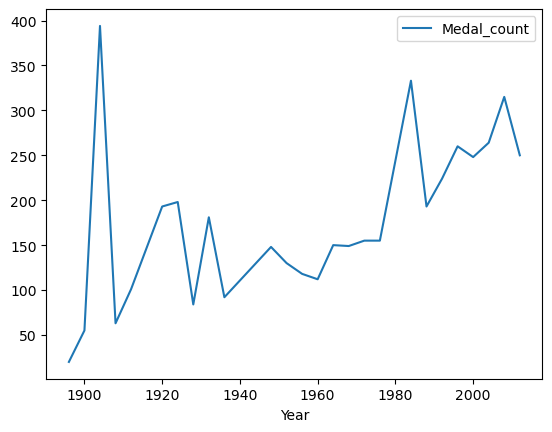

In [8]:
#plot the dataframe
usa_df.plot()

# Time Series Forecasting Projections Using Prophet

In [9]:
#reset the index of the DataFrame
prophet_df = usa_df.drop('Country', axis=1).reset_index()

In [10]:
prophet_df.head()

,Year,Medal_count
0,1896,20
1,1900,55
2,1904,394
3,1908,63
4,1912,101


In [11]:
#convert year to datetime
prophet_df['Year'] = pd.to_datetime(prophet_df['Year'], format='%Y')

In [12]:
prophet_df.head()

,Year,Medal_count
0,1896-01-01,20
1,1900-01-01,55
2,1904-01-01,394
3,1908-01-01,63
4,1912-01-01,101


In [13]:
# Prepare the training data to be read into a prophet model
# Rename the columns to names that Prophet recognizes
prophet_df.columns = ['ds', 'y']
prophet_df.head()


,ds,y
0,1896-01-01,20
1,1900-01-01,55
2,1904-01-01,394
3,1908-01-01,63
4,1912-01-01,101


In [14]:
# Confirm that there are no NaN values
prophet_df = prophet_df.dropna()
prophet_df.tail()

,ds,y
21,1996-01-01,260
22,2000-01-01,248
23,2004-01-01,264
24,2008-01-01,315
25,2012-01-01,250


In [15]:
# Call the Prophet function and store as an object
m = Prophet()

In [16]:
# Fit the time series Prophet model
m.fit(prophet_df)

19:06:11 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Create a future DataFrame to hold predictions
future = m.make_future_dataframe(periods=13,freq='Y')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))
display(future.tail(15))

,ds
0,1896-01-01
1,1900-01-01
2,1904-01-01
3,1908-01-01
4,1912-01-01
5,1920-01-01
6,1924-01-01
7,1928-01-01
8,1932-01-01
9,1936-01-01


,ds
24,2008-01-01
25,2012-01-01
26,2012-12-31
27,2013-12-31
28,2014-12-31
29,2015-12-31
30,2016-12-31
31,2017-12-31
32,2018-12-31
33,2019-12-31


In [18]:
future.drop(index=[26,27,28,29,31,32,33,35,36,37],inplace=True)
future.reset_index(inplace=True)
future.tail()

,index,ds
24,24,2008-01-01
25,25,2012-01-01
26,30,2016-12-31
27,34,2020-12-31
28,38,2024-12-31


In [19]:
# Make a forecast based on the future DataFrame
forecast = m.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head())
display(forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1896-01-01,2.651679,-58.313932,132.129255,2.651679,2.651679,32.803982,32.803982,32.803982,32.803982,32.803982,32.803982,0.0,0.0,0.0,35.455661
1,1900-01-01,6.743343,-56.108413,132.880066,6.743343,6.743343,32.803982,32.803982,32.803982,32.803982,32.803982,32.803982,0.0,0.0,0.0,39.547325
2,1904-01-01,10.832207,39.493426,228.757880,10.832207,10.832207,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,130.589736
3,1908-01-01,14.923871,39.904007,225.112878,14.923871,14.923871,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,134.681400
4,1912-01-01,19.015536,41.985609,228.561832,19.015536,19.015536,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,138.773064


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
24,2008-01-01,117.223570,152.211639,326.958955,117.223570,117.223570,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,236.981099
25,2012-01-01,121.316583,147.551419,336.233202,121.316583,121.316583,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,241.074112
26,2016-12-31,126.432149,174.156670,355.610131,126.432108,126.432194,141.294126,141.294126,141.294126,141.294126,141.294126,141.294126,0.0,0.0,0.0,267.726275
27,2020-12-31,130.525162,184.216276,366.807653,130.525029,130.525298,141.294126,141.294126,141.294126,141.294126,141.294126,141.294126,0.0,0.0,0.0,271.819288
28,2024-12-31,134.618175,179.391317,366.222784,134.617926,134.618452,141.294126,141.294126,141.294126,141.294126,141.294126,141.294126,0.0,0.0,0.0,275.912301


/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


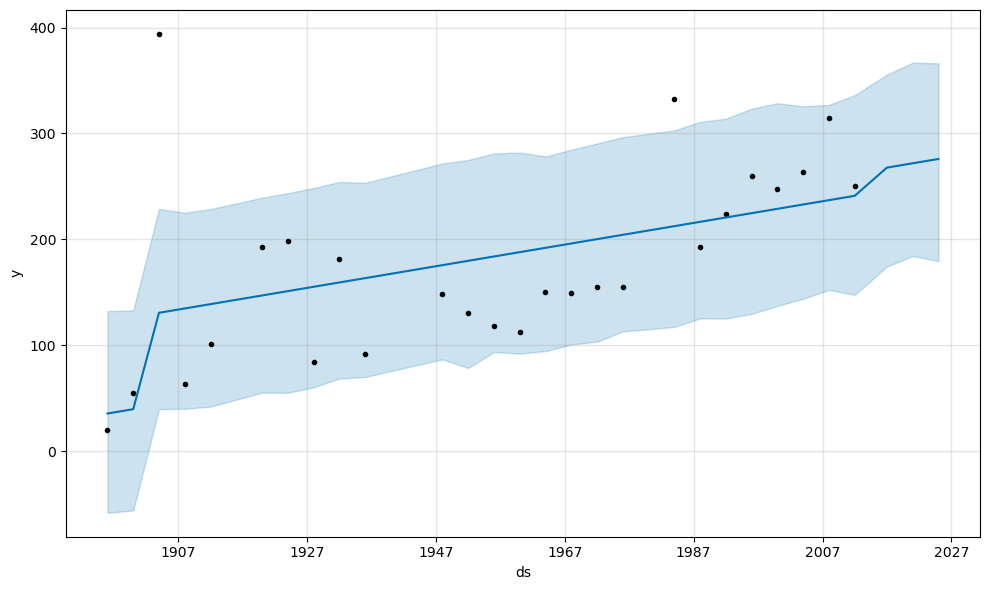

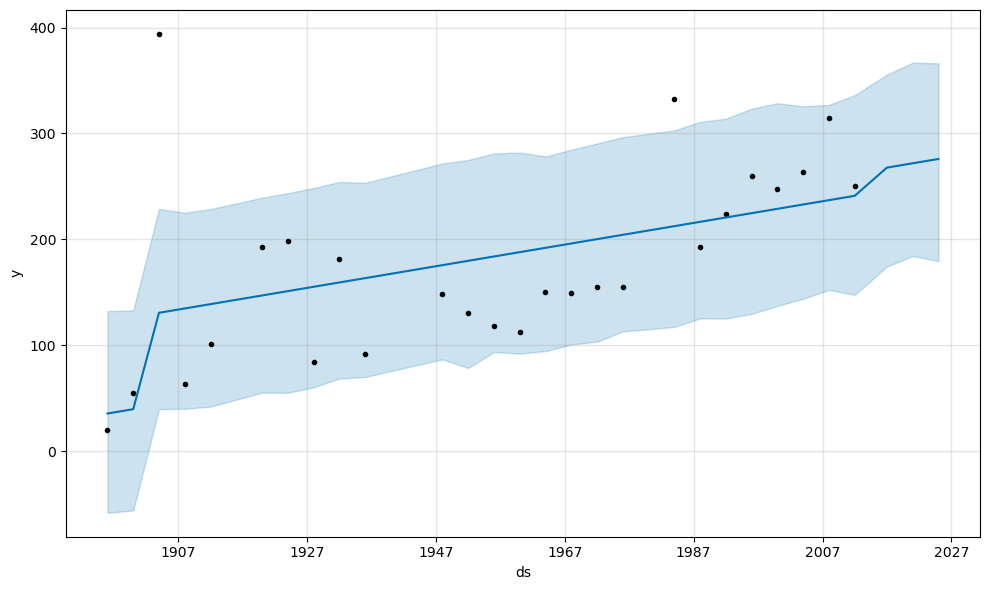

In [20]:
# Plot the forecast using the model’s plot function
m.plot(forecast)

In [21]:
#Plot the Upper and Lower Bounds of the Forecast
# Reset the index to this datetime column so that our plot looks nice
forecast = forecast.set_index('ds')

# Display the DataFrame
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1896-01-01,2.651679,-58.313932,132.129255,2.651679,2.651679,32.803982,32.803982,32.803982,32.803982,32.803982,32.803982,0.0,0.0,0.0,35.455661
1900-01-01,6.743343,-56.108413,132.880066,6.743343,6.743343,32.803982,32.803982,32.803982,32.803982,32.803982,32.803982,0.0,0.0,0.0,39.547325
1904-01-01,10.832207,39.493426,228.757880,10.832207,10.832207,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,130.589736
1908-01-01,14.923871,39.904007,225.112878,14.923871,14.923871,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,134.681400
1912-01-01,19.015536,41.985609,228.561832,19.015536,19.015536,119.757529,119.757529,119.757529,119.757529,119.757529,119.757529,0.0,0.0,0.0,138.773064


<Axes: xlabel='ds'>

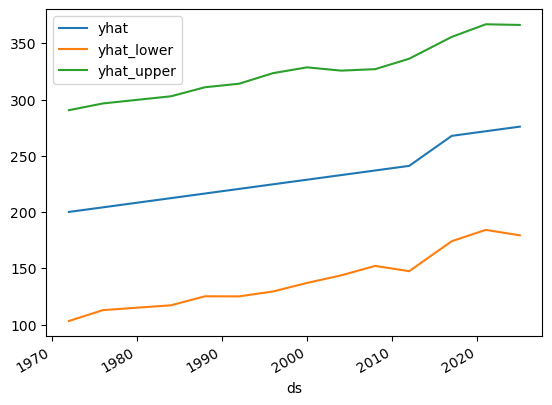

In [22]:
# Plot predictions for our forecast period
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-13:,:].plot()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

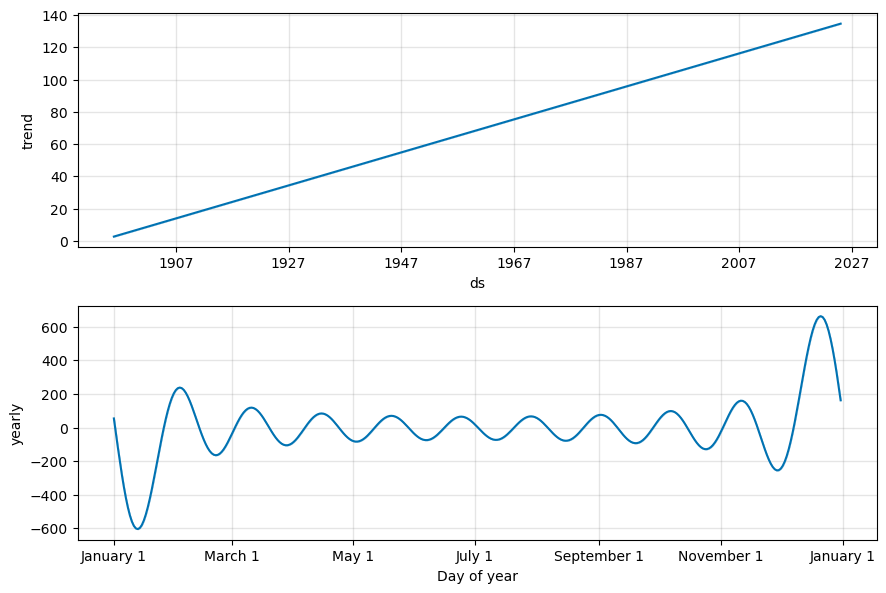

In [23]:
# Reset "ds" from the datetime index back to a column
forecast = forecast.reset_index()

# Plot the individual time series components of the model
fig2 = m.plot_components(forecast)

In [33]:
# Perform cross-validation
df_cv = cross_validation(m, initial='21', period='1', horizon='2')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/25 [00:00<?, ?it/s]

Exception: Less than two datapoints before cutoff. Increase initial window.

# Utilize Model Generator Pipeline to Evaluate Three Models

In [24]:
p_utils.medal_model_generator(medal_ct_country)

Testing Linear Regression
Mean Squared Error: 1131.2244875976912
R-squared: 0.639284838635777
Adjusted R-squared: 0.6367711441314967


/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Testing Random Forest Regressor
Mean Squared Error: 1208.667051034483
R-squared: 0.554864776189081
Adjusted R-squared: 0.5517627885667054
Testing XGB Regressor
Mean Squared Error: 1437.286339517222
R-squared: 0.43243575455654715
Adjusted R-squared: 0.42848060302035584
Linear Regression is the best model


Pipeline(steps=[('One hot encode', OneHotEncoder(handle_unknown='ignore')),
                ('Linear Regression', LinearRegression())])

In [25]:
# 
# Create the grid search estimator along with a parameter object containing the values to adjust.
# Try adjusting n_neighbors with values of 1 through 19. Adjust leaf_size by using 10, 50, 100, and 500.
# Include both uniform and distance options for weights.
# from sklearn.model_selection import GridSearchCV
# param_grid = {
    
# }
# grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)

In [26]:
# Fit the model by using the randomized search estimator.
# random_clf.fit(X_train, y_train)

In [27]:
# columns_to_encode = ['Sport','Country','Gender']

In [28]:
# # Create an encoder for the categorical columns
# ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# # Set up the OneHotEncoder so it will transform to Pandas
# ohe.set_output(transform="pandas")

# # Fit and transform the OneHotEncoder to the columns to encode
# medals_data_ohe = ohe.fit_transform(clean_df[columns_to_encode])
# medals_data_ohe.head()

In [29]:
# # Create an encoder for the categorical ordinal Medal
# medal_ord_enc = OrdinalEncoder(categories=[['Gold','Silver','Bronze']],
#                                             encoded_missing_value=-1, 
#                                             handle_unknown='use_encoded_value', 
#                                             unknown_value=-1)
# # Set up the OneHotEncoder so it will transform to Pandas
# medal_ord_enc.set_output(transform="pandas")


# # Fit and transform the OneHotEncoder to the columns to encode
# medal_ord_enc = medal_ord_enc.fit_transform(clean_df[['Medal']])
# medal_ord_enc.head()


In [30]:
# # Create an encoder for the categorical ordinal column for 
# medal_ord_enc = OrdinalEncoder(categories=[['Gold','Silver','Bronze']],
#                                             encoded_missing_value=-1, 
#                                             handle_unknown='use_encoded_value', 
#                                             unknown_value=-1)
# # Set up the OneHotEncoder so it will transform to Pandas
# medal_ord_enc.set_output(transform="pandas")


# # Fit and transform the OneHotEncoder to the columns to encode
# medal_ord_enc = medal_ord_enc.fit_transform(clean_df[['Medal']])
# medal_ord_enc.head()

In [31]:
# #concat above dataframes
# df_enc = pd.concat([medals_data_ohe,medal_ord_enc],axis=1)
# df_enc.head()